In [1]:
import os
import glob
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

In [2]:
resultdir = "../product/netCDF/"
resultlist = sorted(glob.glob(os.path.join(resultdir, "*.nc")))

In [3]:
domain = [-16., 9., 45., 66.]

In [16]:
m = Basemap(llcrnrlon=domain[0], llcrnrlat=domain[2],
            urcrnrlon=domain[1], urcrnrlat=domain[3], 
            resolution = 'h', epsg=3035)
m = Basemap(width=1200000,height=8000000,
            resolution='l',projection='laea',\
            lat_ts=0.5 * (domain[2] + domain[3]),
            lat_0=0.5 * (domain[2] + domain[3]),
            lon_0=0.5 * (domain[0] + domain[1]))

In [17]:
logo = plt.imread("./logo_emodnet.png")

In [18]:
def read_density(resultfile):
    with netCDF4.Dataset(resultfile) as nc:
        lon = nc.variables["lon"][:]
        lat = nc.variables["lat"][:]
        f = nc.variables["heatmap"][:]
        e = nc.variables["heatmap_error"][:]
        
    return lon, lat, f, e

In [19]:
def make_plot_field(lon, lat, density):
    
    fig = plt.figure(figsize=(10, 10))
    m.drawmapboundary(fill_color='#F9F9F9')
    m.fillcontinents(color='#363636', zorder=4)
    m.drawparallels(np.arange(domain[2], domain[3], 4.), labels=[1,0,0,0], color="w", fontsize=16, zorder=3)
    m.drawmeridians(np.arange(domain[0], domain[1], 8.), labels=[0,0,0,1], color="w", fontsize=16, zorder=3)
    m.drawcountries(color="w", zorder=5)
    pcm = m.pcolormesh(lon, lat, density, latlon=True, shading="gouraud", cmap=plt.cm.hot_r, vmin=0, vmax=1.)
    plt.colorbar(pcm, shrink=.8)
    plt.title("species", fontsize=20)


    newax = fig.add_axes([0.625, 0.2, 0.125, 0.125], zorder=7)
    newax.imshow(logo)
    newax.axis('off')
    plt.show()

In [20]:
lon, lat, field, error = read_density(resultlist[0])
llon, llat = np.meshgrid(lon, lat)

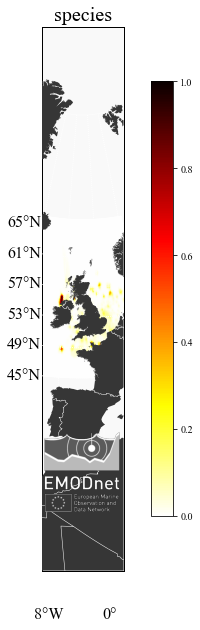

In [21]:
make_plot_field(llon, llat, field)